<a href="https://colab.research.google.com/github/bibekuchiha/EDA/blob/master/Data%20Visualization/Metrics%20for%20foodwheel/Foodwheel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Board Slides for FoodWheel

FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

* What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
* How has the average order amount changed over time? What does this say about the trajectory of the company?
* How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?
* Over this project, you will analyze several DataFrames and create several visualizations to help answer these questions.

#FoodWheel: Let the Food Choose For You
##What cuisines does FoodWheel offer?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

restaurants = pd.read_csv('restaurants.csv')

print(restaurants.head())

cuisine_options_count = restaurants.cuisine.nunique()
print("There are "+str(cuisine_options_count) +' options for cuisine')

cuisine_counts = restaurants.groupby('cuisine')['name'].count().reset_index()
print('The number of restaurants of each cuisine are :'+str(cuisine_counts))

   id                name neighborhood  cuisine
0   1          Jongro BBQ      Midtown   Korean
1   2            Pocha 32      Midtown   Korean
2   3  Nom Wah Tea Parlor    Chinatown  Chinese
3   4           Roberta’s     Brooklyn    Pizza
4   5        Speedy Romeo     Brooklyn    Pizza
There are 7 options for cuisine
The number of restaurants of each cuisine are :      cuisine  name
0    American    10
1     Chinese    11
2     Italian     8
3    Japanese     4
4      Korean     3
5       Pizza     4
6  Vegetarian     4


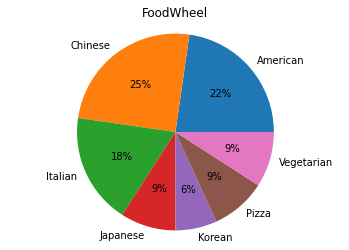

In [3]:
cuisine_counts = restaurants.groupby('cuisine')\
                            .name.count()\
                            .reset_index()

cuisines = cuisine_counts.cuisine.values
counts = cuisine_counts.name.values


plt.pie(counts,
        labels=cuisines,
       autopct='%d%%')
plt.title('FoodWheel')
plt.axis('equal')
plt.show()

##Orders Over Time

*  How has the average order amount changed over time?
*  What does this say about the trajectory of the company?

In [15]:
orders = pd.read_csv('orders.csv')

print(orders.head())

orders['month'] = orders.date.apply(lambda x: x.split('-')[0])

print(orders.head())

avg_order = orders.groupby('month').price.mean().reset_index()

print(avg_order)

std_order = orders.groupby('month').price.std().reset_index()
print(std_order)

   id  customer_id       date  price
0   1           61  6-18-2017   13.0
1   2          210   5-8-2017   21.0
2   3            0   9-7-2017   33.0
3   4           66   7-7-2017   19.0
4   5           65  4-26-2017   13.0
   id  customer_id       date  price month
0   1           61  6-18-2017   13.0     6
1   2          210   5-8-2017   21.0     5
2   3            0   9-7-2017   33.0     9
3   4           66   7-7-2017   19.0     7
4   5           65  4-26-2017   13.0     4
  month      price
0     4   9.609195
1     5  14.858824
2     6  15.152174
3     7  18.012821
4     8  21.150685
5     9  29.505882
  month     price
0     4  2.562504
1     5  3.395210
2     6  2.835934
3     7  2.848985
4     8  4.455556
5     9  4.518806


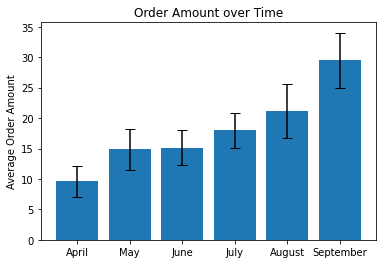

In [17]:

ax = plt.subplot()
bar_heights = avg_order.price
bar_errors = std_order.price

plt.bar(range(len(bar_heights)),
  			bar_heights,
        yerr=bar_errors,
       capsize=5)
ax.set_xticks(range(len(bar_heights)))
ax.set_xticklabels(['April', 'May', 'June', 'July', 'August', 'September'])
plt.ylabel('Average Order Amount')
plt.title('Order Amount over Time')
plt.show()

#Customer Types
There is a range of amounts that customers spend on FoodWheel. Let’s investigate and aim to answer our final question:

* How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

In [19]:
customer_amount = orders.groupby('customer_id').price.sum().reset_index()

print(customer_amount.head())

   customer_id  price
0            0   83.0
1            2   11.0
2            3   65.0
3            4   32.0
4            5  119.0


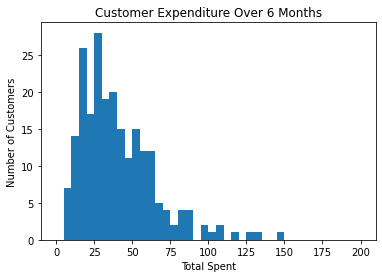

In [20]:
plt.hist(customer_amount.price.values,
        range=(0, 200), bins=40)
plt.xlabel('Total Spent')
plt.ylabel("Number of Customers")
plt.title('Customer Expenditure Over 6 Months')

plt.show()